<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
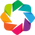

In [2]:
!pip install bokeh hvplot
!pip install Cartopy
!pip install geoviews
!pip install pyproj
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
from scipy.stats import linregress


In [3]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import time


# Import API key
from api_key import geoapify_key



In [4]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"


# Read the  data 
disaster_metadata = pd.read_csv(disaster_path)



disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [5]:

disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [6]:
#Drop columns we don't need
clean_disaster_metadata = disaster_metadata.drop(columns=['Glide', 'Seq', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'ISO', 'Start Day','End Day', 'Local Time', 'River Basin', 'No Injured', 'No Affected', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', """Reconstruction Costs ('000 US$)""",
       '''Insured Damages ('000 US$)''', 'Latitude', 'Longitude', 'Location', 'No Homeless'])
clean_disaster_metadata.head()


,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN


In [7]:
#drop unique values
len(clean_disaster_metadata['Dis No'].unique())

14644

In [8]:
# drop any duplicate values
clean_disaster_metadata= clean_disaster_metadata.drop_duplicates()
clean_disaster_metadata.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN


In [20]:
# # Function to get latitude and longitude of a country
# def get_country_lat_long(country, api_key):
#     url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
#     try:
#         response = requests.get(url)
#         response.raise_for_status()  # Raise HTTPError for bad responses
#         data = response.json()
#         if data['features']:
#             latitude = data['features'][0]['geometry']['coordinates'][1]
#             longitude = data['features'][0]['geometry']['coordinates'][0]
#             return latitude, longitude
#         else:
#             print(f"No results found for {country}. Response: {data}")
#             return None, None
#     except requests.RequestException as e:
#         print(f"Error fetching data for {country}. Error: {e}")
#         return None, None

# # Ensure columns for latitude and longitude are initialized
# if 'Lat' not in clean_disaster_metadata.columns:
#     clean_disaster_metadata["Lat"] = None
# if 'Lng' not in clean_disaster_metadata.columns:
#     clean_disaster_metadata["Lng"] = None

# # Get latitudes and longitudes for each country and update the disaster_countries_df DataFrame
# for index, row in clean_disaster_metadata.iterrows():
#     country = row['Country']
#     lat, long = get_country_lat_long(country, geoapify_key)
#     if lat is not None and long is not None:
#         print(f"{country}: Latitude = {lat}, Longitude = {long}")
#         clean_disaster_metadata.at[index, 'Lat'] = lat
#         clean_disaster_metadata.at[index, 'Lng'] = long
#     else:
#         print(f"Could not get coordinates for {country}")
        
# # Verify that no extra rows labeled 'Lat' and 'Lng' are present
# if 'Lat' in clean_disaster_metadata.index:
#     clean_disaster_metadata.drop('Lat', inplace=True)
# if 'Lng' in clean_disaster_metadata.index:
#     clean_disaster_metadata.drop('Lng', inplace=True)

# #clean_disaster_metadata.to_csv("output_data/country_coordinates.csv", index_label="country_coordinates")

    

Argentina: Latitude = -34.9964963, Longitude = -64.9672817
Australia: Latitude = -24.7761086, Longitude = 134.755
Benin: Latitude = 9.5293472, Longitude = 2.2584408
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Brazil: Latitude = -10.3333333, Longitude = -53.2
Brazil: Latitude = -10.3333333, Longitude = -53.2
Barbados: Latitude = 13.1500331, Longitude = -59.5250305
Botswana: Latitude = -23.1681782, Longitude = 24.5928742
Canada: Latitude = 61.0666922, Longitude = -107.991707
Switzerland: Latitude = 46.7985624, Longitude = 8.2319736
China: Latitude = 35.000074, Longitude = 104.999927
China: Latitude = 35.000074, Longitude = 104.999927
Côte d’Ivoire: Latitude = 7.9897371, Longitude = -5.5679458
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Colombia: Latitude = 4.099917, Longitude = -72.9088133
Co

In [9]:
%%capture --no-display
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use lng/lat)
#show number of death based on size of circles in map


# Ensure the correct data types
clean_disaster_metadata['Lat'] = pd.to_numeric(clean_disaster_metadata['Lat'], errors='coerce')
clean_disaster_metadata['Lng'] = pd.to_numeric(clean_disaster_metadata['Lng'], errors='coerce')
clean_disaster_metadata['Total Deaths'] = pd.to_numeric(clean_disaster_metadata['Total Deaths'], errors='coerce')
clean_disaster_metadata['Country'] = clean_disaster_metadata['Country'].astype(str)
clean_disaster_metadata['Disaster Type'] = clean_disaster_metadata['Disaster Type'].astype(str)

# Drop rows with NaN values in Lat, Lng, or Total Deaths
clean_disaster_metadata.dropna(subset=['Lat', 'Lng', 'Total Deaths'], inplace=True)

# Ensure there are no mixed types in any columns
print(clean_disaster_metadata.dtypes)

# Configure the map plot
map_plot = clean_disaster_metadata.hvplot.points(
    'Lng', 'Lat', 
    geo=True,
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    size='Total Deaths',
    scale=0.1,
    color='Country',
    hover_cols=['Disaster Type']
)

# Display the map
map_plot

KeyError: 'Lat'

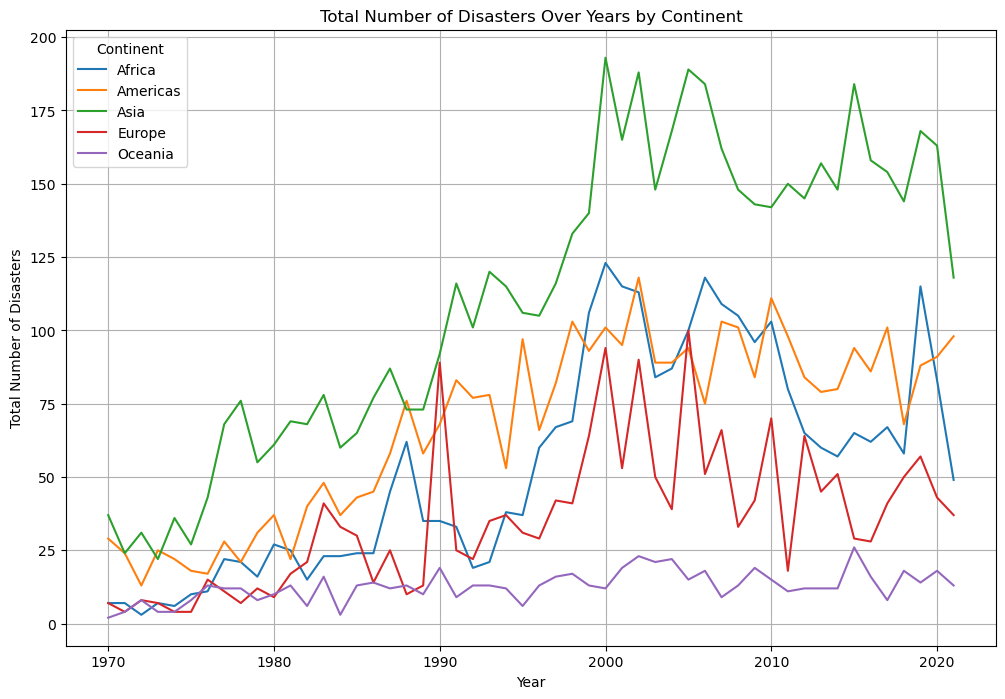

In [10]:
#plot line chart for total number of disasters over years against continents

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

for continent in disasters_per_year_continent.columns:
    plt.plot(disasters_per_year_continent.index, disasters_per_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters Over Years by Continent')
plt.legend(title='Continent')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")
plt.show()

In [62]:

# Summary Statistics

summary_stats = clean_disaster_metadata.groupby('Continent')[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].agg(['mean', 'median'])

# Reset index to have 'Continent' as a column for easier reshaping
summary_stats = summary_stats.reset_index()

# Reshape the DataFrame so that continents are in rows and both mean and median statistics are in columns
summary_stats_df = summary_stats.set_index('Continent')

# Display the DataFrame
summary_stats_df




Total Deaths        Total Affected           \
                  mean median           mean   median   
Continent                                               
Africa      478.875776   20.0   2.495687e+05   5141.0   
Americas    232.774476   11.0   1.732628e+05   4417.5   
Asia        439.287885   24.0   1.490446e+06  13909.0   
Europe      186.895370    6.0   4.377098e+04   1000.0   
Oceania      24.399317    5.0   5.682968e+04   2000.0   

          Total Damages ('000 US$)            
                              mean    median  
Continent                                     
Africa                1.254839e+05   13561.0  
Americas              1.152306e+06  115000.0  
Asia                  7.592515e+05   53100.0  
Europe                5.629060e+05  109000.0  
Oceania               3.198101e+05   39427.0

In [ ]:
# Frequency Distribution
frequency_distribution = clean_disaster_metadata['Continent'].value_counts()
frequency_distribution

Continent
Asia        4606
Americas    2288
Africa      1932
Europe      1080
Oceania      293
Name: count, dtype: int64

In [ ]:

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)
disasters_per_year_continent

Continent,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1970,5,21,28,7,2
1971,2,15,20,2,3
1972,2,11,23,4,5
1973,5,21,17,5,3
1974,3,18,24,3,3
1975,7,12,18,4,1
1976,4,13,36,5,1
1977,11,16,50,8,5
1978,13,15,56,6,3


In [ ]:

# Trend Analysis
trend_analysis = disasters_per_year_continent.describe()
trend_analysis

Continent,Africa,Americas,Asia,Europe,Oceania
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,44.000000,88.576923,20.769231,5.634615
std,29.020875,20.771398,40.561909,14.697759,2.883549
min,2.000000,11.000000,17.000000,2.000000,1.000000
25%,10.750000,27.000000,53.000000,8.000000,3.000000
50%,31.000000,45.000000,96.500000,19.000000,6.000000
75%,55.000000,63.000000,120.000000,28.000000,8.000000
max,96.000000,79.000000,151.000000,62.000000,14.000000


## Total Damages vs Total Deaths Linear Regression plot 

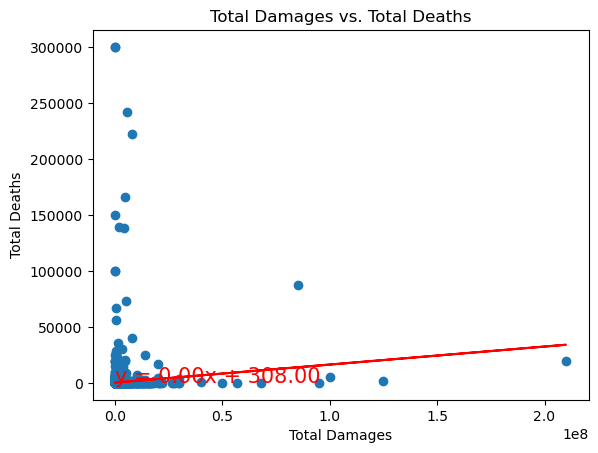

R-squared value: 0.007052201801855545


In [31]:

def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()
    
    return r_value

df = clean_disaster_metadata.dropna(subset=['Total Deaths'])  # Drop rows where 'Total Deaths' is NaN
df.fillna(0, inplace=True)  # Fill other NaN values with 0

# Example usage of the function
x_values = df["Total Damages ('000 US$)"]
y_values = df['Total Deaths']

r_value = linear_regression_plot(x_values, y_values, 'Total Damages', 'Total Deaths', 'Total Damages vs. Total Deaths')
print(f"R-squared value: {r_value**2}")

The R-squared value of approximately 0.007 indicates that the linear regression model explains only about 0.7% of the variance in the Total Deaths based on the Total Damages. This is a very low value, suggesting that Total Damages is not a good predictor for Total Deaths in your dataset.

This low R-squared value implies that the relationship between Total Damages and Total Deaths is weak. There might be other factors influencing Total Deaths that are not captured by Total Damages. It might be useful to explore other features or combinations of features to find better predictors for Total Deaths.

In [36]:
# Aggregation by Country
country_aggregation = clean_disaster_metadata.groupby('Country').agg({
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()
country_aggregation_df=pd.DataFrame(country_aggregation)
country_aggregation_df


,Country,Total Deaths,Total Affected,Total Damages ('000 US$)
0,Afghanistan,22939.0,5498395.0,176120.0
1,Albania,264.0,1100131.0,738400.0
2,Algeria,7089.0,1742996.0,11783846.0
3,American Samoa,40.0,2503.0,50000.0
4,Angola,6222.0,1216512.0,12000.0
...,...,...,...,...
214,Yemen Arab Rep,1657.0,604362.0,2012700.0
215,Yemen P Dem Rep,507.0,690000.0,1008000.0
216,Yugoslavia,298.0,322274.0,450000.0
217,Zambia,1420.0,2960180.0,200.0
